In [7]:
from tensor import nn as nn
import tensor.optimizers as optimizers
import tensor.losses as losses
from utils import visualize
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

In [2]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]

In [3]:
class Model(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.dense1 = nn.layer_dense(4, 3, 'relu', '0')
        self.dense2 = nn.layer_dense(4, 4, 'relu', '1')
        self.dense3 = nn.layer_dense(1, 4, 'tanh', '2')
    
    def forward(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        
        return x

In [4]:
model = Model()
optimizer = optimizers.SGD(model.parameters(), 0.01)
loss_fn = losses.MSE()

print(model)
print(optimizer)
print(loss_fn)

Model Short Summary::

dense1: n_params: 16
dense2: n_params: 20
dense3: n_params: 5

Total params: 41

SGD optimizer
MSE loss function


In [5]:
for _ in range(10000):
    y_pred = [model.forward(x) for x in xs]
    loss = loss_fn(ys, y_pred)
    print(f"epoch: {_}: current loss -> {loss.data}")
    
    model.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0: current loss -> 7.6518415721811746
epoch: 1: current loss -> 7.609918100288159
epoch: 2: current loss -> 7.5614989237424055
epoch: 3: current loss -> 7.503451967939678
epoch: 4: current loss -> 7.431417625082309
epoch: 5: current loss -> 7.340403839088328
epoch: 6: current loss -> 7.223032710791038
epoch: 7: current loss -> 7.068124106314799
epoch: 8: current loss -> 6.858328252464405
epoch: 9: current loss -> 6.5662393179782494
epoch: 10: current loss -> 6.148579080362108
epoch: 11: current loss -> 5.642972702861645
epoch: 12: current loss -> 5.390739272923838
epoch: 13: current loss -> 5.113207985142593
epoch: 14: current loss -> 4.808818789868164
epoch: 15: current loss -> 4.4865115001878575
epoch: 16: current loss -> 4.154247812161433
epoch: 17: current loss -> 3.8978374546851775
epoch: 18: current loss -> 3.6637874123688796
epoch: 19: current loss -> 3.436765636494383
epoch: 20: current loss -> 3.2191220054966765
epoch: 21: current loss -> 3.0398084757422543
epoch: 22: c

In [6]:
y_pred = [model.forward(x) for x in xs]
y_pred

[array([Tensor(0.9904257187794089)], dtype=object),
 array([Tensor(-0.996637868267809)], dtype=object),
 array([Tensor(-0.9948990739350154)], dtype=object),
 array([Tensor(0.9904257187794089)], dtype=object)]

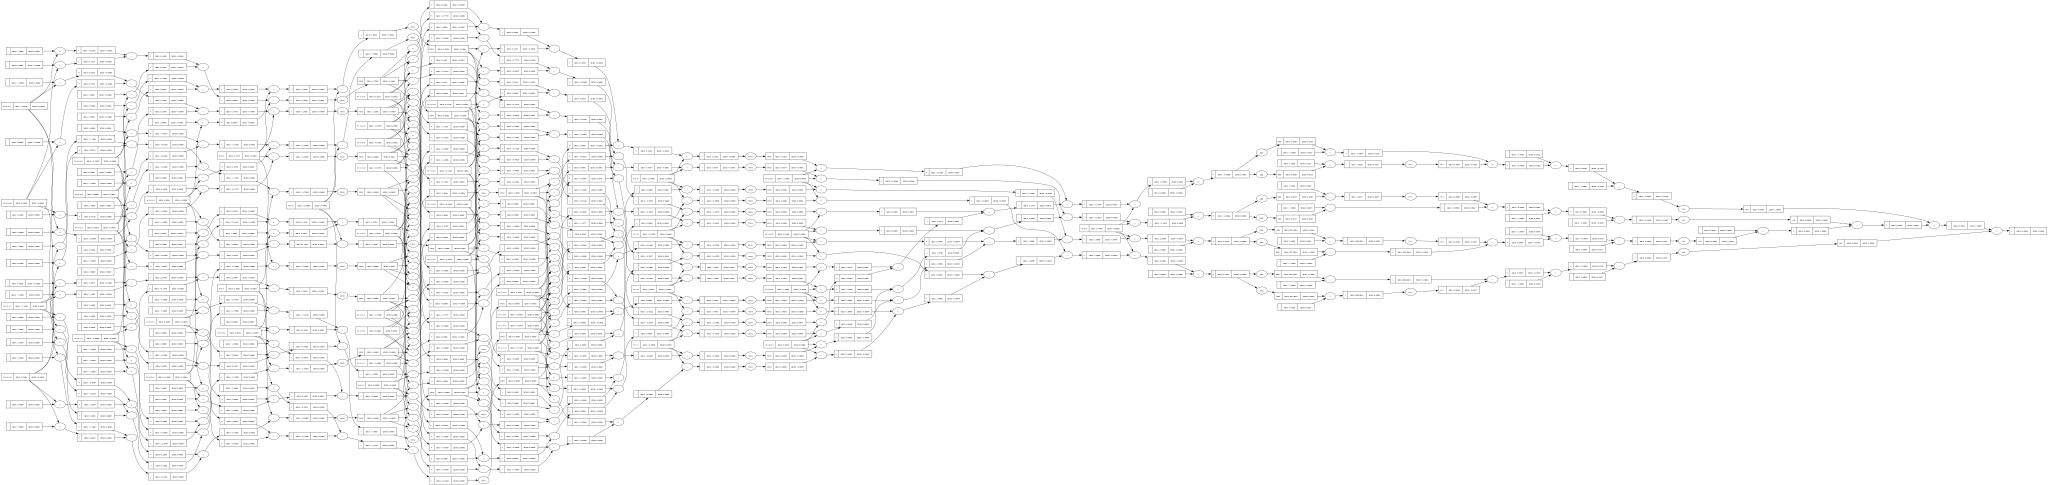

In [7]:
visualize.draw_dot(loss)